In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Load the dataset into python environment

In [2]:
data=pd.read_csv(r"D:\titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 2. Do all the necessary pre-processing steps

In [4]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId') # Make ‘PassengerId’ as the index column
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Check the basic details of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.shape

(891, 11)

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Fill in all the missing values present in all the columns in the dataset

In [9]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.drop(['Cabin'],inplace=True,axis=1) 
#Cabin column has 687 missing values and doesnot provide insight to the analysis so can be omitted

In [11]:
for i in ['Age']:
    data[i]=data[i].fillna(data[i].median())
#filling missing values in 'Age' column using median

In [12]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
data['Embarked'] = data['Embarked'].fillna('S')
# filling categorical columnn 'Embarked' with most common class

In [15]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [16]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [17]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
data1=data.drop(['Name', 'Ticket'],axis=1) #dropping less important columns
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()  
data1['Sex']=le.fit_transform(data1['Sex'])
data1['Embarked']=le.fit_transform(data1['Embarked'])

In [21]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [22]:
#splitting the data and target
X=data1.drop(('Survived'),axis=1)
y=data1['Survived']

In [23]:
#Splitting the Data into Training Data and Test Data
from sklearn.model_selection import train_test_split

In [24]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.15)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(757, 7) (134, 7) (757,) (134,)


# 3. Create kNN and SVM models

In [25]:
#1. KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
metric_k=[]
neighbors=range(3,15)
for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k)
    Classifier=Classifier.fit(X_train,y_train)
    y_pred_knn_mm=Classifier.predict(X_test)
    acc_knn_mm=accuracy_score(y_test,y_pred_knn_mm)
    
    metric_k.append(acc_knn_mm)

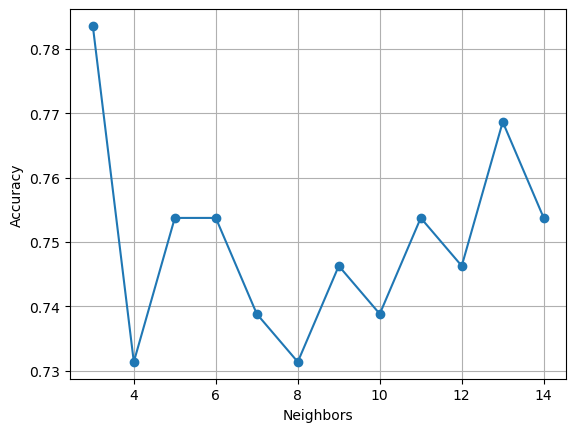

In [27]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [28]:
#selecting the negibor which gives highest accuracy
Classifier=KNeighborsClassifier(n_neighbors=3)
Classifier=Classifier.fit(X_train,y_train)
y_KNN_predict=Classifier.predict(X_test)

In [29]:
confusion_matrix(y_test,y_KNN_predict)

array([[67, 11],
       [18, 38]], dtype=int64)

In [30]:
acc_knn=accuracy_score(y_test,y_KNN_predict)
print('The Accurcy Score of KNN is ',round(acc_knn,5))

The Accurcy Score of KNN is  0.78358


In [31]:
#2. SVM using linear kernel
from sklearn.svm import SVC

In [32]:
clf_svm = SVC(kernel='linear')
clf_svm = clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
confusion_matrix(y_test, y_pred_svm)

array([[66, 12],
       [17, 39]], dtype=int64)

In [33]:
acc_svm = accuracy_score(y_test, y_pred_svm)
print('The Accurcy Score of SVM using linear kernel is ',round(acc_svm,5))

The Accurcy Score of SVM using linear kernel is  0.78358


In [34]:
#3. SVM using rbf kernel
clf_svm2 = SVC(kernel = 'rbf')
clf_svm2 = clf_svm2.fit(X_train, y_train)
y_pred_svm2 = clf_svm2.predict(X_test)
confusion_matrix(y_test, y_pred_svm2)

array([[73,  5],
       [41, 15]], dtype=int64)

In [35]:
acc_svm2 = accuracy_score(y_test, y_pred_svm2)
print('The Accurcy Score of SVM using rbf kernel is ',round(acc_svm2,5))

The Accurcy Score of SVM using rbf kernel is  0.65672


In [36]:
# After min max scaling

In [37]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2


In [38]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max_scaler.fit_transform(X)
type(X)

numpy.ndarray

In [39]:
X=pd.DataFrame(X,columns=['Pclass','Sex', 'Age','SibSp','Parch','Fare', 'Embarked'])

In [40]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0
1,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0
2,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0
3,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0
4,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0


In [41]:
data2=data.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],axis=1)
data2.head()

,Survived,Name,Sex,Ticket,Embarked
PassengerId,,,,,
1,0,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,0,"Allen, Mr. William Henry",male,373450,S


In [42]:
data3=pd.concat([data2,X],axis=1)
data3.head()

,Survived,Name,Sex,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0.0,"Braund, Mr. Owen Harris",male,A/5 21171,S,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0
3,1.0,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0
5,0.0,"Allen, Mr. William Henry",male,373450,S,1.0,1.0,0.346569,0.000,0.0,0.016510,0.5


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.15)

In [44]:
#4. KNN using MinMaxScaler
metric_k=[]
neighbors=range(3,15)
for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k)
    Classifier=Classifier.fit(X_train,y_train)
    y_pred_knn_mm=Classifier.predict(X_test)
    acc_knn_mm=accuracy_score(y_test,y_pred_knn_mm)
    metric_k.append(acc_knn_mm)

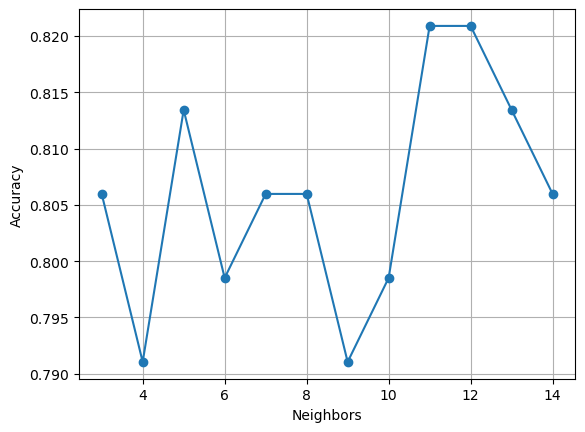

In [45]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [46]:
Classifier=KNeighborsClassifier(n_neighbors=11)
Classifier=Classifier.fit(X_train,y_train)
y_pred_knn_mm=Classifier.predict(X_test)
confusion_matrix(y_test,y_pred_knn_mm)

array([[70,  8],
       [16, 40]], dtype=int64)

In [47]:
acc_knn_mm=accuracy_score(y_test,y_pred_knn_mm)
print('The Accurcy Score of KNN with MinMax scaling is ',round(acc_knn_mm,5))

The Accurcy Score of KNN with MinMax scaling is  0.8209


In [48]:
#5. SVM method using MinMaxScaler linear kernel

In [49]:
clf_svm_mm = SVC(kernel = 'linear')
clf_svm_mm = clf_svm_mm.fit(X_train, y_train)
y_pred_svm_mm = clf_svm_mm.predict(X_test)
confusion_matrix(y_test, y_pred_svm_mm)

array([[66, 12],
       [17, 39]], dtype=int64)

In [50]:
acc_svm_mm = accuracy_score(y_test,y_pred_svm_mm)
print('The Accurcy Score of SVM with MinMax scaling using linear kernel is ',round(acc_svm_mm,5))

The Accurcy Score of SVM with MinMax scaling using linear kernel is  0.78358


In [51]:
#6. SVM method using MinMaxScaler rbf kernel
clf_svmr_mm = SVC(kernel = 'rbf')
clf_svmr_mm = clf_svmr_mm.fit(X_train, y_train)
y_pred_svmr_mm = clf_svmr_mm.predict(X_test)
confusion_matrix(y_test, y_pred_svmr_mm)

array([[72,  6],
       [20, 36]], dtype=int64)

In [52]:
acc_svmr_mm = accuracy_score(y_test,y_pred_svmr_mm)
print('The Accurcy Score of SVM with MinMax scaling using rbf kernel is ',round(acc_svmr_mm,5))

The Accurcy Score of SVM with MinMax scaling using rbf kernel is  0.80597


In [53]:
print('The Accurcy Score of KNN is ',round(acc_knn,5))
print('The Accurcy Score of SVM using linear kernel is ',round(acc_svm,5))
print('The Accurcy Score of SVM using rbf kernel is ',round(acc_svm2,5))
print('The Accurcy Score of KNN with MinMax scaling is ',round(acc_knn_mm,5))
print('The Accurcy Score of SVM with MinMax scaling using linear kernel is ',round(acc_svm_mm,5))
print('The Accurcy Score of SVM with MinMax scaling using rbf kernel is ',round(acc_svmr_mm,5))

The Accurcy Score of KNN is  0.78358
The Accurcy Score of SVM using linear kernel is  0.78358
The Accurcy Score of SVM using rbf kernel is  0.65672
The Accurcy Score of KNN with MinMax scaling is  0.8209
The Accurcy Score of SVM with MinMax scaling using linear kernel is  0.78358
The Accurcy Score of SVM with MinMax scaling using rbf kernel is  0.80597


kNN with MinMax scaling gives the best Accurcy Score so using that models for k-fold and stratified stratified k-fold cross validation techniques

# 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

In [54]:
#K-Fold validation
from sklearn.model_selection import KFold
kfold_validator = KFold(10)
for train_index, test_index in kfold_validator.split(X,y):
    print ('Training Index :', train_index)
    print ('Test Index :', test_index)

Training Index : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [55]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(Classifier, X, y, cv = kfold_validator)

In [56]:
cv_result

array([0.77777778, 0.82022472, 0.7752809 , 0.78651685, 0.83146067,
       0.82022472, 0.79775281, 0.75280899, 0.83146067, 0.78651685])

In [57]:
np.mean(cv_result)

0.7980024968789012

In [58]:
# Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold()
for train_index, test_index in skfold_validator.split(X,y):
    print ('Training Index :', train_index)
    print ('Test Index :', test_index)

Training Index : [168 169 170 171 173 174 175 176 177 178 179 180 181 182 185 188 189 191
 196 197 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 4

In [59]:
skcv_result = cross_val_score(Classifier, X, y, cv = skfold_validator)
skcv_result

array([0.78212291, 0.7752809 , 0.8258427 , 0.78651685, 0.8258427 ])

In [60]:
np.mean(skcv_result)

0.7991212102190698

In [61]:
print ("Average accuracy score of the models after stratified k-fold cross validation techniques is ", np.mean(cv_result))
print ("Average accuracy score of the models after stratified k-fold cross validation techniques is ", np.mean(skcv_result))

Average accuracy score of the models after stratified k-fold cross validation techniques is  0.7980024968789012
Average accuracy score of the models after stratified k-fold cross validation techniques is  0.7991212102190698


Stratified K-Fold Cross Validation gives slightly better average accuracy score than k-fold cross validation